<a href="https://colab.research.google.com/github/ridlofebrio/FirstML/blob/main/FirstML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = {
    'Lokasi': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T'],
    'Harga per m2': [5000000, 4500000, 6000000, 5500000, 5200000, 4800000, 6100000, 5400000, 5100000, 4700000, 6300000, 5600000, 5300000, 4900000, 6400000, 5700000, 5200000, 4600000, 6200000, 5500000],
    'Luas Tanah': [200, 150, 250, 180, 220, 160, 240, 170, 210, 140, 260, 190, 230, 160, 270, 200, 180, 150, 250, 170],
    'Pendapatan Rata-rata Wilayah': [8000000, 9000000, 7500000, 8500000, 8200000, 8800000, 7600000, 8900000, 8100000, 9300000, 7300000, 8700000, 7900000, 9100000, 7200000, 8500000, 8300000, 9200000, 7400000, 9000000],
    'Harga Jual': [10000000, 11000000, 9500000, 10500000, 10800000, 11200000, 9700000, 10700000, 10300000, 11500000, 9300000, 10600000, 9800000, 11200000, 9200000, 10500000, 10400000, 11400000, 9400000, 11000000]
}
df = pd.DataFrame(data)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


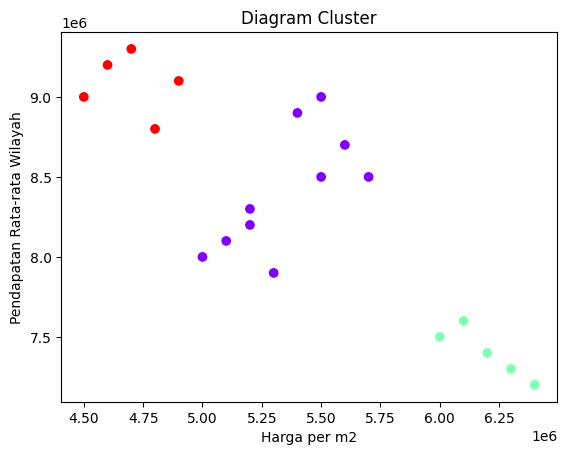

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Memilih fitur untuk clustering
X = df[['Harga per m2', 'Luas Tanah', 'Pendapatan Rata-rata Wilayah']]


kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

plt.scatter(X['Harga per m2'], X['Pendapatan Rata-rata Wilayah'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Harga per m2')
plt.ylabel('Pendapatan Rata-rata Wilayah')
plt.title('Diagram Cluster')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Memisahkan data menjadi fitur dan label
X = df[['Harga per m2', 'Luas Tanah', 'Pendapatan Rata-rata Wilayah']]
y = df['Harga Jual']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

print("Koefisien (intersep):", model.intercept_)
print("Koefisien (koefisien regresi):", model.coef_)
print("Skor R-squared (koefisien determinasi):", model.score(X_test, y_test))


Koefisien (intersep): 2319152.5288177077
Koefisien (koefisien regresi): [-3.56016058e-01  4.75746452e+03  1.08899448e+00]
Skor R-squared (koefisien determinasi): 0.9671893026909666


In [ ]:
from sklearn.metrics import mean_squared_error

# Menggunakan model untuk membuat prediksi
y_pred = model.predict(X_test)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 14170119900.338783
